In [65]:
import matplotlib.pyplot as plt
import numpy as np
import h5py

In [ ]:
# Open the file as read only
file = h5py.File('./cell_data.h5', 'r')

(a) Plot the number of images per brain.

In [6]:
for key in file.keys():
    print('Brain {} has {} images'.format(key, len(file[key])))

Brain B01 has 276 images
Brain B02 has 377 images
Brain B05 has 242 images
Brain B07 has 245 images
Brain B20 has 208 images


(b) Plot the distribution of image sizes in an interpretable way.

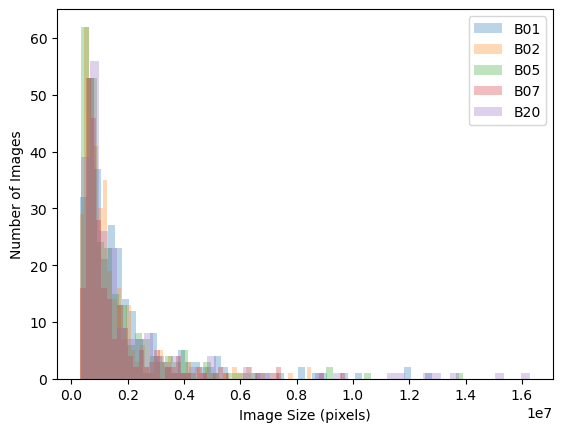

In [54]:
for key in file.keys():
    image_sizes = []
    for subkey in file[key].keys():
        # get the shape of each image
        size = file[key][subkey].size
        # flatten the shape and append to the list
        image_sizes.append(size)
    # plot the histogram
    plt.hist(image_sizes, bins=50, alpha=0.3, label=key)

# plot the histogram
plt.xlabel('Image Size (pixels)')
plt.ylabel('Number of Images')
plt.legend()
plt.show()

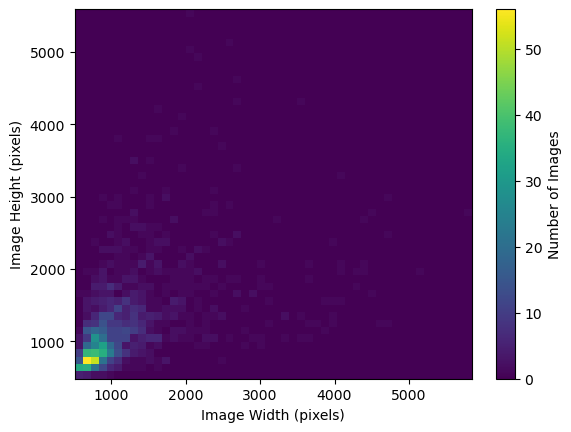

In [8]:
# or we could try 2D histogram
image_sizes_2d = []
for key in file.keys():
    for subkey in file[key].keys():
        # get the shape of each image
        shape = file[key][subkey].shape
        # flatten the shape and append to the list
        image_sizes_2d.append(shape)

# plot the histogram
plt.hist2d([x[0] for x in image_sizes_2d], [x[1] for x in image_sizes_2d], bins=50)
plt.xlabel('Image Width (pixels)')
plt.ylabel('Image Height (pixels)')
plt.colorbar(label='Number of Images')
plt.show()

(c) Checkout the largest and smallest images per brain and visualize them.

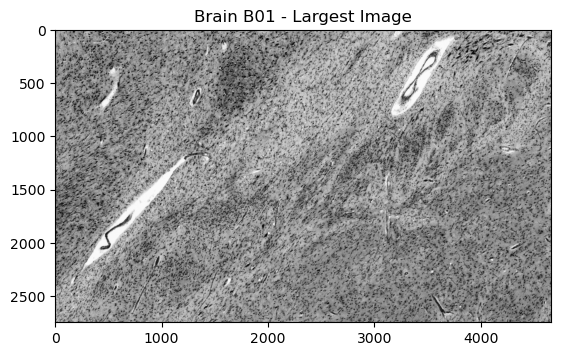

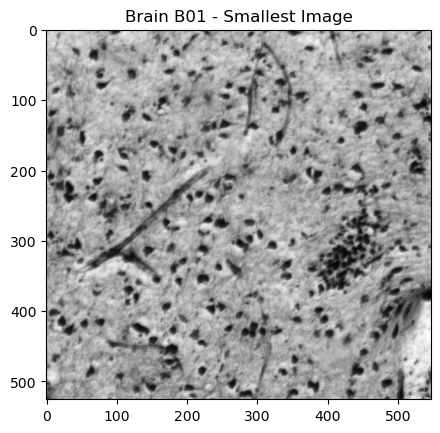

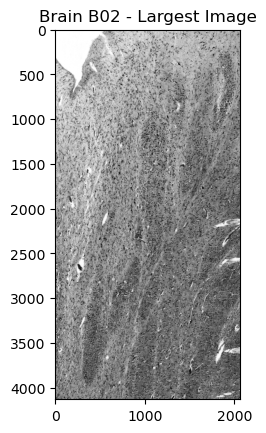

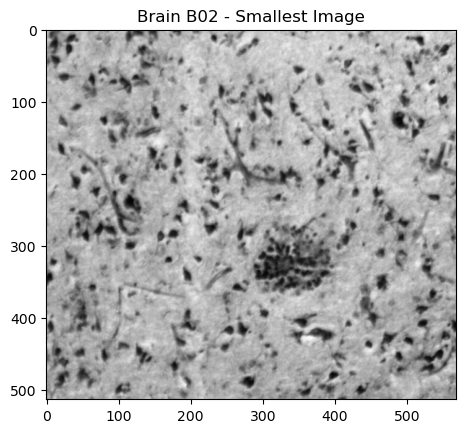

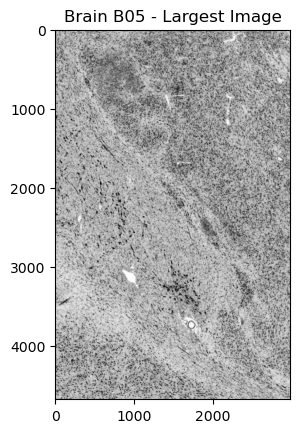

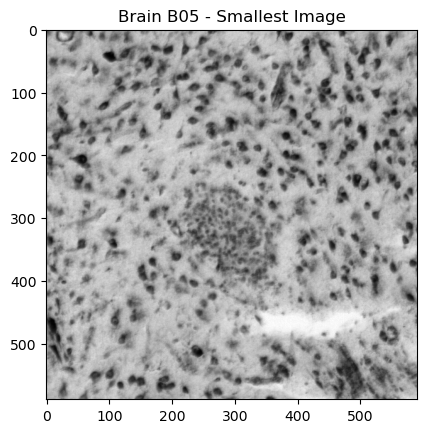

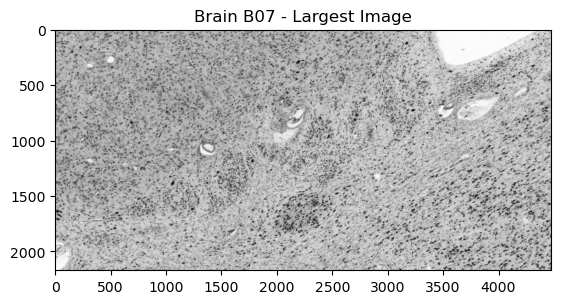

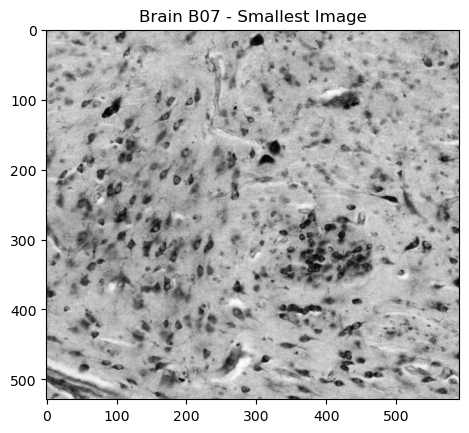

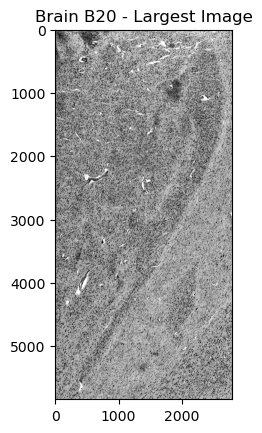

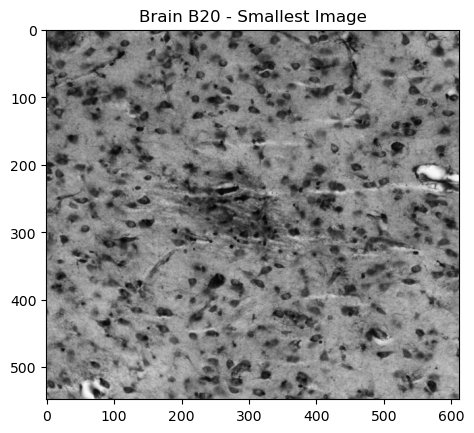

In [9]:
for key in file.keys():
    image_sizes = {}
    for subkey in file[key].keys():
        # get the shape of each image
        shape = file[key][subkey].shape
        # flatten the shape and append to the list
        image_sizes[subkey] = shape[0] * shape[1]
    # plot the largest and smallest image per brain
    subkey_max = (max(image_sizes, key=image_sizes.get))
    plt.imshow(file[key][subkey_max], cmap='gray')
    plt.title('Brain {} - Largest Image'.format(key))
    plt.show()
    subkey_min = (min(image_sizes, key=image_sizes.get))
    plt.imshow(file[key][subkey_min], cmap='gray')
    plt.title('Brain {} - Smallest Image'.format(key))
    plt.show()

(e) Determine and store the global `maximum`, `minimum`, `mean` and `standard deviation`
for the image pixel values of the training data.

storing all the pixel values causes an overflow, so I shall find a way to reduce
the size of stored data

for maximum and minimum, it is enough just to store the max and min of each image

for mean:

$$\frac{1}{N_1} \sum_{i=1}^{N_1} v_i = \mu_1 = E[I_1]$$
$$\frac{1}{N_2} \sum_{i=1}^{N_2} v_i = \mu_2 = E[I_2]$$

$$\frac{1}{N_1 + N_2} \sum_{i=1}^{N_1 + N_2} v_i = p_1 \mu_1 + p_2 \mu_2 = \mu$$

for variance:
$$\sigma^2 = (p_1 E[I_1^2] + p_2 E[I_2^2]) - \mu^2$$

Here,
$$p_1 = \frac{N_1}{N_1 + N_2}$$

In [ ]:
pixel_values = np.empty((0,5))
for key in file.keys():
    if key == 'B20':
        continue
    print('Processing brain {}'.format(key))
    for subkey in file[key].keys():
        # get the pixel values
        image = file[key][subkey][:].astype(np.float32)
        # store the size of each image, min, max, mean, and mean squared pixel values
        tuple = np.array([[image.size, image.min(), image.max(), image.mean(), (image**2).mean()]])
        pixel_values = np.append(pixel_values, tuple, axis=0)


Processing brain B01
Processing brain B02
Processing brain B05
Processing brain B07


In [64]:
global_values = {}
# the weights for each image
p = pixel_values[:,0]/np.sum(pixel_values[:,0])
# calculate the global min
global_values['min'] = np.min(pixel_values[:,1])
# calculate the global max
global_values['max'] = np.max(pixel_values[:,2])
# calculate the global mean
global_values['mean'] = p @ pixel_values[:,3]
# calculate the global mean squared
mean_squared= p @ pixel_values[:,4]
# calculate the global standard deviation
global_values['std'] = np.sqrt(mean_squared - global_values['mean']**2)

print(global_values)

{'min': 0.0, 'max': 255.0, 'mean': 152.55165567568403, 'std': 48.74067325235052}
